# Optimal Pricing for Turo

The largest car-sharing firm based in the United States, Turo, enables private car owners to rent out their cars via an online platform in over 56 countries. After analyzing competitive advantages and disadvantages of Turo’s website, we suggested adding a new category feature “Browse by category” to its website that filters out car listings in addition to “Browse by make” and “Browse by destination”. Through cluster analysis, we created the following three vehicle categories: Spacious, Luxury and Economy. Moreover, we established a pricing system that helps car hosts to set the optimal prices that maximize their revenue with log-log regression.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd 

In [2]:
# Import data into pandas dataframe
Turo = pd.read_csv('car rental turo data.csv')
level =  pd.read_csv('Brand Level.csv')

# Data Cleaning

### Take a brief look at the data

In [3]:
Turo.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,state,model,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,population
0,NaN,0,0,0.0,False,False,False,NaN,29,11,...,Iowa,Fusion,Ford,58905,7/28/2014 21:43,2014,car,True,2014,3109350
1,5.00,1,1,100.0,False,False,True,NaN,162,8,...,Minnesota,718 Boxster,Porsche,403202,4/7/2018 21:48,2017,car,True,2018,5606249
2,NaN,0,0,NaN,False,False,True,NaN,40,5,...,West Virginia,Cruze,Chevrolet,320436,9/14/2017 2:27,2014,car,True,2017,1817004
3,3.75,4,5,100.0,False,False,True,NaN,99,19,...,Pennsylvania,6 Series,BMW,350460,11/30/2017 5:03,2006,car,True,2017,12787641
4,NaN,0,0,NaN,False,False,False,NaN,81,17,...,Pennsylvania,Explorer,Ford,429146,5/24/2018 14:07,2017,suv,True,2018,12800922


In [4]:
Turo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rating                 21060 non-null  float64
 1   renterTripsTaken       36279 non-null  int64  
 2   reviewCount            36279 non-null  int64  
 3   responseRate           27845 non-null  float64
 4   newListing             36279 non-null  bool   
 5   freeDeliveryPromotion  36279 non-null  bool   
 6   instantBookDisplayed   36279 non-null  bool   
 7   deliveryLabel          9038 non-null   object 
 8   averageDailyPrice      36279 non-null  int64  
 9   scalar                 36279 non-null  int64  
 10  city                   36279 non-null  object 
 11  longitude              36279 non-null  float64
 12  latitude               36279 non-null  float64
 13  state                  36279 non-null  object 
 14  model                  36279 non-null  object 
 15  ma

### Extract year, month and date from timestamp column

In [5]:
# Create the column listingyear: year of the listing created
Turo['listingyear'] = pd.DatetimeIndex(Turo['listingCreatedTime']).year
Turo['listingyear'].head()

0    2014
1    2018
2    2017
3    2017
4    2018
Name: listingyear, dtype: int64

In [6]:
Turo['listingyear'].value_counts()

2018    18312
2017    12330
2016     4556
2015      791
2014      218
2013       54
2012       18
Name: listingyear, dtype: int64

In [7]:
# Create the column listingmonth: month of the listing created
Turo['listingmonth'] = pd.DatetimeIndex(Turo['listingCreatedTime']).month
Turo['listingmonth'].head()

0     7
1     4
2     9
3    11
4     5
Name: listingmonth, dtype: int64

In [8]:
# Create the column listingCreatedDate: date of the listing created
Turo["listingCreatedDate"] = pd.to_datetime(Turo["listingCreatedTime"]).dt.date
Turo['listingCreatedDate'].head()

0    2014-07-28
1    2018-04-07
2    2017-09-14
3    2017-11-30
4    2018-05-24
Name: listingCreatedDate, dtype: object

### Impute Missing Values

In [9]:
# Check whether there is missing values
print(Turo.isnull().sum())
# There are missing values in rating, responseRate, and deliveryLabel

rating                   15219
renterTripsTaken             0
reviewCount                  0
responseRate              8434
newListing                   0
freeDeliveryPromotion        0
instantBookDisplayed         0
deliveryLabel            27241
averageDailyPrice            0
scalar                       0
city                         0
longitude                    0
latitude                     0
state                        0
model                        0
make                         0
id                           0
listingCreatedTime           0
year                         0
type                         0
automaticTransmission        0
listingyear                  0
population                   0
listingmonth                 0
listingCreatedDate           0
dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


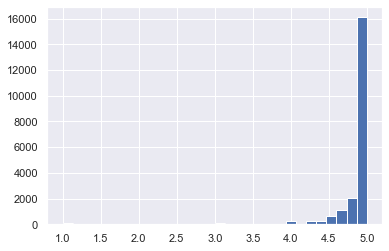

In [10]:
plt.hist(Turo['rating'],bins=30)
plt.show() 
# Most listings get ratings around 4.5 - 5.0. We can assume the missing ratings
# are similar to the mean rating

In [11]:
# impute missing values in rating with mean
Turo['rating'].fillna((Turo['rating'].mean()), inplace=True)

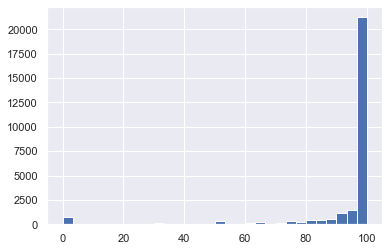

In [12]:
# There is 0 in reponse rate. We can assume the missing value is 0. 
plt.hist(Turo['responseRate'],bins=30)
plt.show() 

In [13]:
# Impute missing response rate with 0
Turo['responseRate'] = Turo['responseRate'].fillna(0)

In [14]:
Turo['deliveryLabel'].value_counts()
# This column has either "FREE DELIVERY" or "None". We can drop this 
# column because it is not meaningful

FREE DELIVERY    9038
Name: deliveryLabel, dtype: int64

# EDA

### renterTripsTaken (representing the demand)

In [15]:
Turo['renterTripsTaken'].describe()
# Min is 0. Max is 450, which may be an outlier.  

count    36279.000000
mean        11.040823
std         22.486039
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max        450.000000
Name: renterTripsTaken, dtype: float64

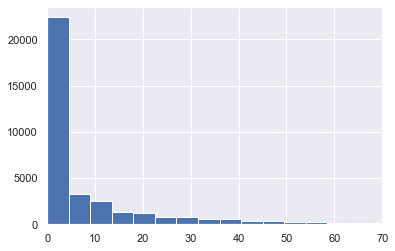

In [16]:
plt.hist(Turo['renterTripsTaken'],bins=100)
plt.xlim(0,70)
plt.show() 

## averageDailyPrice

In [17]:
Turo['averageDailyPrice'].describe()

count    36279.000000
mean        98.566471
std        112.602460
min         10.000000
25%         39.000000
50%         64.000000
75%        110.000000
max       1999.000000
Name: averageDailyPrice, dtype: float64

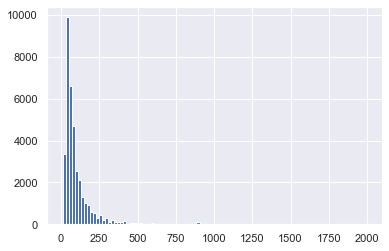

In [18]:
plt.hist(Turo['averageDailyPrice'],bins=100)
plt.show() 
# left skewed, with an outlier = 1999 

In [19]:
Turo[Turo["listingyear"] == 2017]

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,population,listingmonth,listingCreatedDate
2,4.873181,0,0,0.0,False,False,True,NaN,40,5,...,Chevrolet,320436,9/14/2017 2:27,2014,car,True,2017,1817004,9,2017-09-14
3,3.750000,4,5,100.0,False,False,True,NaN,99,19,...,BMW,350460,11/30/2017 5:03,2006,car,True,2017,12787641,11,2017-11-30
10,5.000000,13,13,100.0,False,True,True,FREE DELIVERY,252,3,...,Tesla,360830,12/29/2017 17:16,2017,car,True,2017,9973114,12,2017-12-29
11,5.000000,5,4,100.0,False,False,True,NaN,84,7,...,Ford,278040,6/8/2017 13:45,2007,car,True,2017,9973114,6,2017-06-08
15,4.888900,38,28,100.0,False,False,True,NaN,119,14,...,GMC,281422,6/16/2017 15:23,2016,suv,True,2017,9973114,6,2017-06-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,5.000000,7,5,100.0,False,True,True,NaN,60,2,...,Ford,307985,8/15/2017 21:40,2014,truck,True,2017,7423362,8,2017-08-15
36271,5.000000,13,12,90.0,False,False,True,FREE DELIVERY,50,3,...,Honda,206336,3/24/2017 0:09,2012,car,True,2017,7423362,3,2017-03-24
36272,5.000000,7,5,100.0,False,True,True,NaN,38,14,...,Jeep,357430,12/19/2017 22:31,2012,suv,True,2017,7423362,12,2017-12-19
36273,5.000000,4,2,100.0,False,False,False,NaN,53,14,...,Ford,274882,5/31/2017 22:14,2013,truck,True,2017,7423362,5,2017-05-31


## Demand v.s. Price

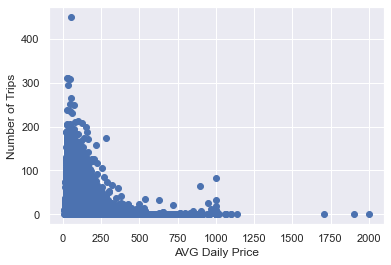

In [20]:
plt.scatter(Turo['averageDailyPrice'], Turo['renterTripsTaken'])
plt.xlabel("AVG Daily Price")
plt.ylabel("Number of Trips")
plt.show() 
# There seems to be a curve pattern in the plot. 
# The higher the price,the lower the number of trips. 
# Therefore, using renterTripsTaken to represent demand makes sense. 

# Demand over time



#### Overall trend


In [21]:
demand_over_time = Turo[["renterTripsTaken","listingCreatedDate"]].groupby(by=["listingCreatedDate"]).sum()

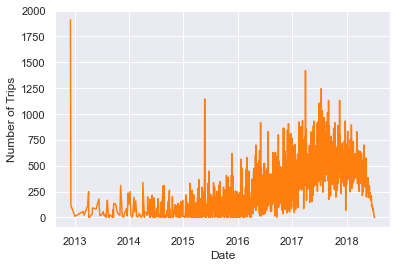

In [22]:
plt.plot(demand_over_time.index, demand_over_time["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.show()
# 2012 has an extremely high trip demand. The demand increases until mid-2017 and then goes down.  

### Seasonal trend by year

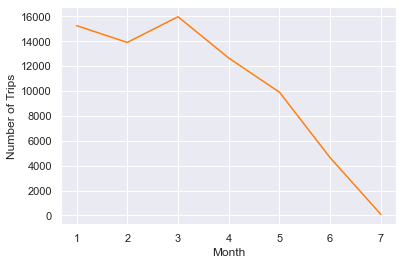

In [23]:
# Demand in 2018
demand_18 = Turo[Turo["listingyear"] == 2018]
demand_18 = demand_18[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_18.index, demand_18["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

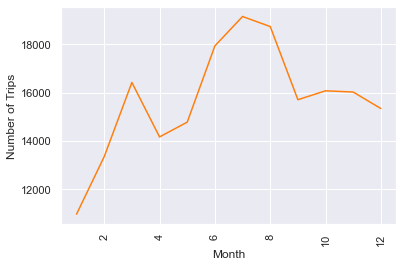

In [24]:
# Demand in 2017
demand_17 = Turo[Turo["listingyear"] == 2017]
demand_17 = demand_17[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_17 .index, demand_17["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

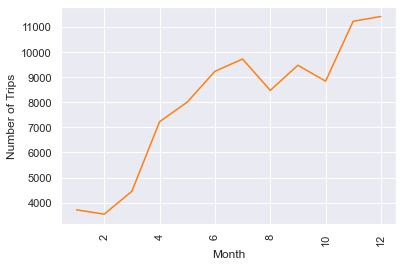

In [25]:
# Demand in 2016
demand_16 = Turo[Turo["listingyear"] == 2016]
demand_16 = demand_16[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_16 .index, demand_16["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

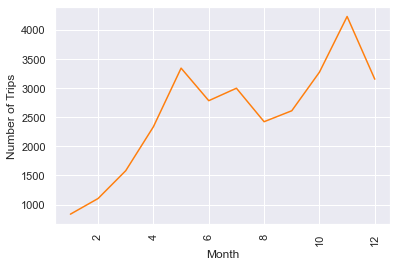

In [26]:
# Demand in 2015
demand_15 = Turo[Turo["listingyear"] == 2015]
demand_15 = demand_15[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_15 .index, demand_15["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

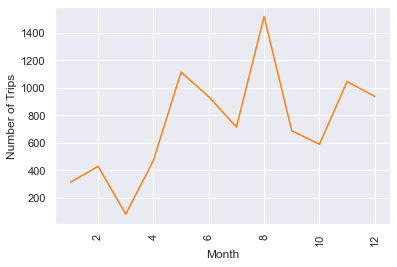

In [27]:
# Demand in 2014
demand_14 = Turo[Turo["listingyear"] == 2014]
demand_14 = demand_14[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_14 .index, demand_14["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

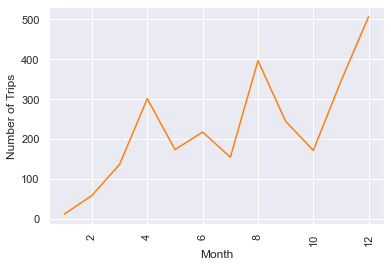

In [28]:
# Demand in 2013
demand_13 = Turo[Turo["listingyear"] == 2013]
demand_13 = demand_13[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_13 .index, demand_13["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

Every year, the seasonal change in demand is different.

In [29]:
# Demand in 2012
demand_12 = Turo[Turo["listingyear"] == 2012]
demand_12 = demand_12[["renterTripsTaken","listingCreatedTime"]].groupby(by=["listingCreatedTime"]).sum()
demand_12.head()
# There are only two records in 2012. We may need to exclude 2012 from our analysis. 

,renterTripsTaken
listingCreatedTime,
12/4/2012 19:12,1912
12/7/2012 1:40,115


### Overall seasonal trend

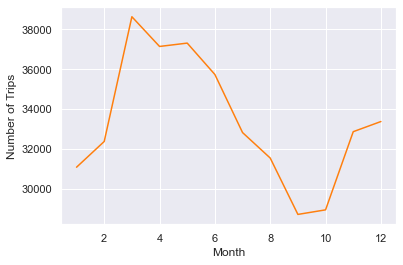

In [30]:
demand_over_month = Turo[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_over_month.index, demand_over_month["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

# Model building

### Use k-means clustering to create different car categories

In [32]:
# Every year the demand looks different and 2017 has fairly large sample size, 
# so we focus on the 2017 data.
# Only keep the variables that are related to car itself: 
# Drop the geographical information like city, state, longitude and latitude. 
# Drop deliveryLabel because this column has only one meaningful value. 
# Drop the time variable such as listingyear, month and listingCreatedTime
# to strip the seasonality information 
# Drop renterTripsTaken, responserate, newListing, freeDeliveryPromotion, 
# instantBookDisplayed, year, population and model(600+ unique values, meaningless)

df_2017 = Turo[Turo["listingyear"] == 2017]
df_2017 = df_2017.drop(['renterTripsTaken','responseRate','newListing','freeDeliveryPromotion',
                        'instantBookDisplayed','city','state','deliveryLabel','id', 'listingCreatedTime',
                       'listingmonth', 'longitude', 'latitude',
                      'listingCreatedDate','model','population'], axis=1)
df_2017

,rating,reviewCount,averageDailyPrice,scalar,make,year,type,automaticTransmission,listingyear
2,4.873181,0,40,5,Chevrolet,2014,car,True,2017
3,3.750000,5,99,19,BMW,2006,car,True,2017
10,5.000000,13,252,3,Tesla,2017,car,True,2017
11,5.000000,4,84,7,Ford,2007,car,True,2017
15,4.888900,28,119,14,GMC,2016,suv,True,2017
...,...,...,...,...,...,...,...,...,...
36269,5.000000,5,60,2,Ford,2014,truck,True,2017
36271,5.000000,12,50,3,Honda,2012,car,True,2017
36272,5.000000,5,38,14,Jeep,2012,suv,True,2017
36273,5.000000,2,53,14,Ford,2013,truck,True,2017


In [33]:
# Create new feature age_before_listing representing how long the car has been 
# used before listed
df_2017['age_before_listing']=df_2017['listingyear']-df_2017['year']
df_2017 = df_2017.drop(['listingyear'], axis = 1)
df_2017 = df_2017.drop(['year'], axis = 1)

In [34]:
# create new feature brand level
df_2017=df_2017.merge(level, how='left', on='make')
df_2017.head()
df_2017

,rating,reviewCount,averageDailyPrice,scalar,make,type,automaticTransmission,age_before_listing,Level
0,4.873181,0,40,5,Chevrolet,car,True,3,Economy
1,3.750000,5,99,19,BMW,car,True,11,Economy
2,5.000000,13,252,3,Tesla,car,True,0,Good
3,5.000000,4,84,7,Ford,car,True,10,Economy
4,4.888900,28,119,14,GMC,suv,True,1,Good
...,...,...,...,...,...,...,...,...,...
12325,5.000000,5,60,2,Ford,truck,True,3,Economy
12326,5.000000,12,50,3,Honda,car,True,5,Economy
12327,5.000000,5,38,14,Jeep,suv,True,5,Economy
12328,5.000000,2,53,14,Ford,truck,True,4,Economy


In [35]:
print(df_2017['type'].astype('category').value_counts())
# combine van and minivan since van only has 33 records
df_2017['type'] = df_2017['type'].replace(['van'],'minivan')
print(df_2017['type'].astype('category').value_counts())

car        8110
suv        3214
minivan     490
truck       483
van          33
Name: type, dtype: int64
car        8110
suv        3214
minivan     523
truck       483
Name: type, dtype: int64


In [36]:
X = df_2017
# Encoding binomial data
X['automaticTransmission'] = (np.where(X['automaticTransmission'] == 'True', 1,0 ))

# Encoding categorical variable: type
cleanup_type = {"type":   {"car": 1, "minivan": 2, 'truck': 3, 'suv':4}}
X = X.replace(cleanup_type)

# Encoding categorical variable: level
cleanup_level = {"Level":   {"Economy": 1, "Good": 2, 'Luxury': 3}}
X = X.replace(cleanup_level)
X = X.drop('make', axis = 1)
X

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,rating,reviewCount,averageDailyPrice,scalar,type,automaticTransmission,age_before_listing,Level
0,4.873181,0,40,5,1,0,3,1
1,3.750000,5,99,19,1,0,11,1
2,5.000000,13,252,3,1,0,0,2
3,5.000000,4,84,7,1,0,10,1
4,4.888900,28,119,14,4,0,1,2
...,...,...,...,...,...,...,...,...
12325,5.000000,5,60,2,3,0,3,1
12326,5.000000,12,50,3,1,0,5,1
12327,5.000000,5,38,14,4,0,5,1
12328,5.000000,2,53,14,3,0,4,1


To determine the optimal number of categories generated by k-means clustering, we computed the Within-Cluster-Sum of Squared Errors for different values of k to obtain the SSE-k scree plot. The KneeLocator function shows that k = 3 was the optimal classification parameter. 

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [38]:
# Scale the data before fitting k-means
# In general, attribute scaling is important to be applied with K-means. 
# Most of the time, the standard Euclidean distance is used (as a distance 
# function of K-means) with the assumption that the attributes are normalized.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


## Choose K with the elbow method

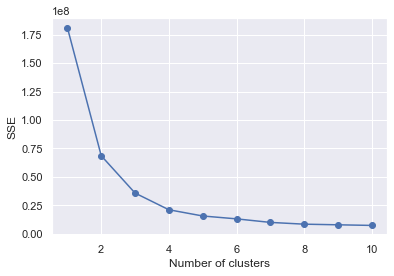

In [39]:
# calculate SSE for a range of number of cluster
SSE_list = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    SSE_list.append(km.inertia_)

# Elbow method to choose the optimal k
plt.plot(range(1, 11), SSE_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [41]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Using the b   elbow method, we chose 3 as the number of clusters
from kneed import KneeLocator
kl = KneeLocator(
   range(1, 11), SSE_list, curve="convex", direction="decreasing"
   )
print(kl.elbow)

3


### Create three clusters with K-means

In [43]:
# Fit k means with the number of clusters = 3
kmeans = KMeans(n_clusters=3)

# Label the data with 0, 1 and 2
y_kmeans = kmeans.fit_predict(scaled_features)

In [44]:
result = pd.DataFrame(y_kmeans)
result = result.rename(columns={0: 'Predict'})
# Combine the result with the original dataset
X_pred = pd.concat([X,result],axis=1)
X_pred

,rating,reviewCount,averageDailyPrice,scalar,type,automaticTransmission,age_before_listing,Level,Predict
0,4.873181,0,40,5,1,0,3,1,1
1,3.750000,5,99,19,1,0,11,1,1
2,5.000000,13,252,3,1,0,0,2,1
3,5.000000,4,84,7,1,0,10,1,1
4,4.888900,28,119,14,4,0,1,2,2
...,...,...,...,...,...,...,...,...,...
12325,5.000000,5,60,2,3,0,3,1,2
12326,5.000000,12,50,3,1,0,5,1,1
12327,5.000000,5,38,14,4,0,5,1,2
12328,5.000000,2,53,14,3,0,4,1,2


In [45]:
X_pred['Predict'].value_counts()

1    6738
2    3509
0    2083
Name: Predict, dtype: int64

In [46]:
centers = pd.DataFrame(kmeans.cluster_centers_)
names= X.columns
centers = scaler.inverse_transform(centers)
centers = pd.DataFrame(centers)
centers.columns = names
centers

,rating,reviewCount,averageDailyPrice,scalar,type,automaticTransmission,age_before_listing,Level
0,4.864703,46.254466,52.699179,6.015934,1.311444,0.0,3.802028,1.523419
1,4.859313,5.859280,115.336987,9.609095,1.062213,0.0,4.588950,1.677826
2,4.882605,8.153364,114.147092,9.230616,3.869441,0.0,3.159920,1.691562


The algorithm clusters data points majorly by review count, average daily price, and car type. Based on the difference in cluster means, we labeled the clusters as Economy, Luxury and Spacious.  Category 0 is labeled as Economy since it has the lowest average daily price and highest review count. Category 1 is labeled as Luxury because of its high average daily price. Category 2 is labeled as Spacious due to its Type being larger than the other categories. We encoded car type with 1 for car, 2 for minivan, 3 for truck and 4 for SUV. The larger the value, the bigger the car.


### Build Regression Model to estimate the demand-price elasticity and predict the optimal price

Y = number of trips

X = average daliy price + rating + reviewCount + responseRate + age_before_listing + population + the number of available cars in the neighbourhood + listingmonth(seasonality)

The number of available cars in the neighbourhood is created by aggregating the car listings within 10 miles

In [74]:
turo_2017 = Turo[Turo["listingyear"] == 2017]
### the number of available cars in the neighbourhood 
### We take the range of [-10,10] around the longitude latitude as the neighbourhood (nearby 10 miles cars)
turo_2017['long_range_low']= turo_2017['longitude']-0.14
turo_2017['long_range_up']= turo_2017['longitude']+0.14
turo_2017['lat_range_low']= turo_2017['latitude']-0.14
turo_2017['lat_range_up']= turo_2017['latitude']+0.14
turo_2017.head()

<ipython-input-74-515c1fd469a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turo_2017['long_range_low']= turo_2017['longitude']-0.14
<ipython-input-74-515c1fd469a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turo_2017['long_range_up']= turo_2017['longitude']+0.14
<ipython-input-74-515c1fd469a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,type,automaticTransmission,listingyear,population,listingmonth,listingCreatedDate,long_range_low,long_range_up,lat_range_low,lat_range_up
2,4.873181,0,0,0.0,False,False,True,NaN,40,5,...,car,True,2017,1817004,9,2017-09-14,-80.699747,-80.419747,40.211722,40.491722
3,3.750000,4,5,100.0,False,False,True,NaN,99,19,...,car,True,2017,12787641,11,2017-11-30,-80.362071,-80.082071,40.378838,40.658838
10,5.000000,13,13,100.0,False,True,True,FREE DELIVERY,252,3,...,car,True,2017,9973114,12,2017-12-29,-83.547713,-83.267713,42.631464,42.911464
11,5.000000,5,4,100.0,False,False,True,NaN,84,7,...,car,True,2017,9973114,6,2017-06-08,-83.439671,-83.159671,42.605824,42.885824
15,4.888900,38,28,100.0,False,False,True,NaN,119,14,...,suv,True,2017,9973114,6,2017-06-16,-83.605325,-83.325325,42.385521,42.665521


In [119]:
# Find number of cars in one car's neighbourhood
#num_neighbour = list()
#for j in range(len(turo_2017)):
#    num_car = 0
#    for i in range(len(turo_2017)):
#         if (np.array(turo_2017['longitude'])[i] >= np.array(turo_2017['long_range_low'])[j]) == True and (np.array(turo_2017['longitude'])[i] <= np.array(turo_2017['long_range_up'])[j]) ==True and ( np.array(turo_2017['latitude'])[i] <= np.array(turo_2017['lat_range_low'])[j]) ==True and (np.array(turo_2017['latitude'])[i] <= np.array(turo_2017['lat_range_up'])[j]) ==True:
#            num_car = num_car + 1
    # print(j)
#    num_neighbour.append(num_car)
    
#import timeit

#start = timeit.default_timer()

#Your statements here

#stop = timeit.default_timer()

#print('Time: ', stop - start)  

In [159]:
# import regress_x3 dataset which contains the num_neigh column 
Regress_X3 = pd.read_csv('Regress_X3.csv')
Regress_X3 = pd.concat([Regress_X3,X_pred['Predict']],axis=1)
Regress_X3

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,automaticTransmission,population,age_before_listing,type_new,listingmonth,num_neigh,Predict
0,4.873181,0,0,0,0,0,1,40,5,1,1817004,3,0,9,49,1
1,3.750000,4,5,100,0,0,1,99,19,1,12787641,11,0,11,797,1
2,5.000000,13,13,100,0,1,1,252,3,1,9973114,0,0,12,12,1
3,5.000000,5,4,100,0,0,1,84,7,1,9973114,10,0,6,8,1
4,4.888900,38,28,100,0,0,1,119,14,1,9973114,1,2,6,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,5.000000,7,5,100,0,1,1,60,2,1,7423362,3,3,8,267,2
12326,5.000000,13,12,90,0,0,1,50,3,1,7423362,5,0,3,344,1
12327,5.000000,7,5,100,0,1,1,38,14,1,7423362,5,2,12,272,2
12328,5.000000,4,2,100,0,0,0,53,14,1,7423362,4,3,5,272,2


In [160]:
## Class 1- Economy
class1= Regress_X3[Regress_X3['Predict']==0]
class1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,automaticTransmission,population,age_before_listing,type_new,listingmonth,num_neigh,Predict
17,5.0000,57,53,100,0,0,1,59,10,1,1424393,5,2,1,10,0
18,4.9714,37,35,100,0,0,1,34,11,1,1424393,6,0,11,17,0
20,4.6563,35,32,100,0,1,0,42,11,1,1424393,5,0,9,11,0
53,4.9500,46,41,100,0,0,1,37,14,1,6106670,9,0,10,33,0
56,4.9375,41,33,100,0,0,0,40,11,1,624344,7,0,4,0,0


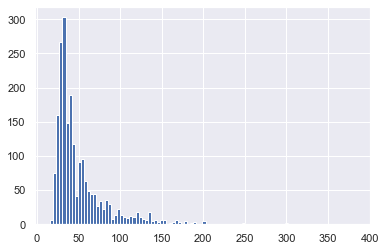

In [201]:
plt.hist(class1['averageDailyPrice'],bins=100)
plt.show() 


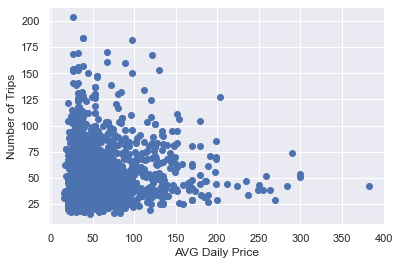

In [214]:
plt.scatter(class1['averageDailyPrice'], class1['renterTripsTaken'])
plt.xlabel("AVG Daily Price")
plt.ylabel("Number of Trips")
plt.show()

In [226]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
### Economy
class1=Regress_X3[Regress_X3['Predict']==0]
class1.head()
X_1=class1.drop(['Predict'], axis=1)
# add 1 to rentertripstaken because log 0 is undefined
model1 = smf.ols('np.log(renterTripsTaken+1) ~  rating + reviewCount + responseRate + age_before_listing + population + listingmonth + num_neigh +np.log(averageDailyPrice)', data=X_1).fit()
print(model1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(renterTripsTaken + 1)   R-squared:                       0.878
Model:                                      OLS   Adj. R-squared:                  0.877
Method:                           Least Squares   F-statistic:                     1858.
Date:                          Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                                  21:00:14   Log-Likelihood:                 1013.1
No. Observations:                          2083   AIC:                            -2008.
Df Residuals:                              2074   BIC:                            -1958.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [223]:
model1.params

Intercept                    3.987594e+00
rating                      -2.009162e-01
responseRate                 1.257730e-02
age_before_listing          -2.536107e-03
population                   2.864786e-12
listingmonth                -5.048508e-02
num_neigh                    3.446338e-05
np.log(averageDailyPrice)   -3.312817e-04
dtype: float64

In [279]:
# Create demand function
def demand_model1(price, rating,responseRate,reviewCount,age_before_listing,population,listingmonth, num_neigh ):
    demand = np.exp(model1.params[0] +  model1.params[1] * rating + model1.params[2] * reviewCount +  
                   model1.params[3] * responseRate + model1.params[4]* age_before_listing +
                   model1.params[5] * population + model1.params[6]* listingmonth   + 
                                   model1.params[7]* num_neigh + model1.params[-1] * np.log(price))

    return demand



Text(0, 0.5, 'Number of Trips')

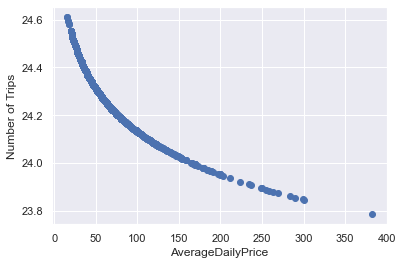

In [280]:
# Predict demand for a listing with rating = 5, reviewcount = 0, responserate = 100, age_before_listing = 1, population = 1424393,
# listingmonth = 5, num_neigh = 10, price from min avgdailyprice to max avgdailyprice

demand_list = list()
for price in class1['averageDailyPrice']:
    demand_list.append(demand_model1(price, 5,100,10,1,1424393,5,10))

plt.scatter(class1['averageDailyPrice'], demand_list)
plt.xlabel("AverageDailyPrice")
plt.ylabel("Number of Trips")

In [274]:
# Class 1 revenue function
def revenue_example(price):
    # Demand * log(price) 
    # Take log of price to scale down the price so that the magnitude of price does not override demand when we multiplying them
    # The change in demand is negligible (23.8-24.6) compared with price in the graph above. 
    # If we multiply demand by price, the revenue function would approximate linear, which means the higher the price, the larger 
    # the revenue, and we don't want that. 
    return np.exp(model1.params[0] +  model1.params[1] * 5 + model1.params[2] * 10 +  model1.params[3] * 100 + 
                                   model1.params[4]*1 + model1.params[5] * 1424393 + model1.params[6]* 5 + 
                                   model1.params[7]* 10 + model1.params[-1] * np.log(price))* np.log(price)* -1

from scipy.optimize import minimize_scalar
max_x = minimize_scalar(revenue_example, bounds=[min(class1['averageDailyPrice']),max(class1['averageDailyPrice'])]
                        ,method='bounded')


In [275]:
max_x

     fun: -141.41166373058516
 message: 'Solution found.'
    nfev: 35
  status: 0
 success: True
       x: 381.9999822616314

Text(0, 0.5, 'Revenue')

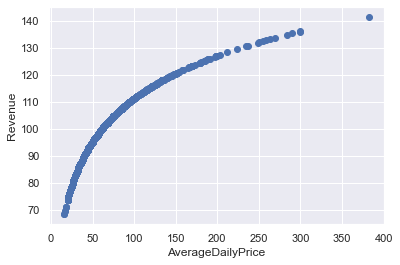

In [281]:
revenue_list = list()
for price in  class1['averageDailyPrice']:
    revenue_list.append(-1*revenue_example(price))
plt.scatter(class1['averageDailyPrice'], revenue_list)
plt.xlabel("AverageDailyPrice")
plt.ylabel("Revenue")

In [115]:
### Class 2 - Luxuary
class2=Regress_X3[Regress_X3['Predict']==1]
X_2=class2.drop(['Predict'], axis=1)
model3 = smf.ols('np.log(renterTripsTaken+1) ~ rating + reviewCount + responseRate + age_before_listing + population + listingmonth + num_neigh + np.log(averageDailyPrice)', data=X_2).fit()
print(model3.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(renterTripsTaken + 1)   R-squared:                       0.868
Model:                                      OLS   Adj. R-squared:                  0.867
Method:                           Least Squares   F-statistic:                     5509.
Date:                          Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                                  14:33:35   Log-Likelihood:                -4274.7
No. Observations:                          6738   AIC:                             8567.
Df Residuals:                              6729   BIC:                             8629.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

<ipython-input-256-4fcfa793120b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class2['renterTripsTaken']= np.exp(model3.params[0] +  model3.params[1] * 5 + model3.params[2] * 10 +  model3.params[3] * 100 +  model3.params[4]*1


Text(0, 0.5, 'Number of Trips')

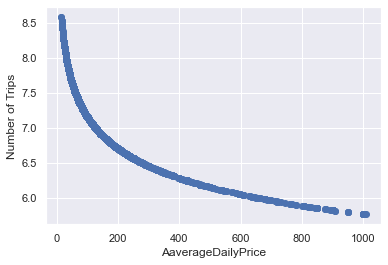

In [256]:
# class 2 demand curve
class2['renterTripsTaken']= np.exp(model3.params[0] +  model3.params[1] * 5 + model3.params[2] * 10 +  model3.params[3] * 100 +  model3.params[4]*1
    + model3.params[5] * 1424393 + model3.params[6]* 5 + model3.params[7]* 10 + model3.params[-1] * np.log(class2['averageDailyPrice']))
plt.scatter(class2['averageDailyPrice'], class2['renterTripsTaken'])
plt.xlabel("AaverageDailyPrice")
plt.ylabel("Number of Trips")

In [261]:
# Class 2 revenue function
def revenue_example(price):
    # Demand * log(price) 
    return np.exp(model2.params[0] +  model2.params[1] * 5 + model2.params[2] * 10 +  model2.params[3] * 100 + 
                                   model2.params[4]*1 + model2.params[5] * 1424393 + model2.params[6]* 5 + 
                                   model2.params[7]* 10 + model2.params[-1] * np.log(price))* np.log(price) * -1

from scipy.optimize import minimize_scalar
max_x = minimize_scalar(revenue_example, bounds=[min(class2['averageDailyPrice']),max(class2['averageDailyPrice'])],method='bounded')

In [262]:
max_x

     fun: -45.5168378496016
 message: 'Solution found.'
    nfev: 36
  status: 0
 success: True
       x: 1007.9999702264009

Text(0, 0.5, 'Revenue')

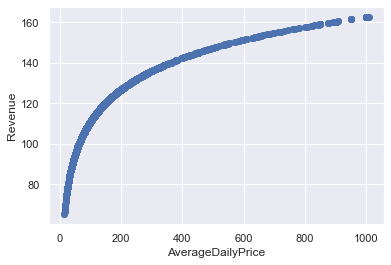

In [282]:

revenue_list = list()
for price in  class2['averageDailyPrice']:
    revenue_list.append(revenue_example(price)*-1)
plt.scatter(class2['averageDailyPrice'], revenue_list)
plt.xlabel("AverageDailyPrice")
plt.ylabel("Revenue")

In [284]:
### Class 3 - Spacious
class3=Regress_X3[Regress_X3['Predict']==2]

X_3=class3.drop(['Predict'], axis=1)
model3 = smf.ols('np.log(renterTripsTaken+1) ~ rating + reviewCount + responseRate + age_before_listing + population + listingmonth + num_neigh + np.log(averageDailyPrice)', data=X_3).fit()
print(model3.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(renterTripsTaken + 1)   R-squared:                       0.849
Model:                                      OLS   Adj. R-squared:                  0.849
Method:                           Least Squares   F-statistic:                     2465.
Date:                          Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                                  12:08:00   Log-Likelihood:                -2714.1
No. Observations:                          3509   AIC:                             5446.
Df Residuals:                              3500   BIC:                             5502.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

<ipython-input-289-296a891f173a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class3['renterTripsTaken']= np.exp(model3.params[0] +  model3.params[1] * 5 + model3.params[2] * 10 +  model3.params[3] * 100 +  model3.params[4]*1


Text(0, 0.5, 'Number of Trips')

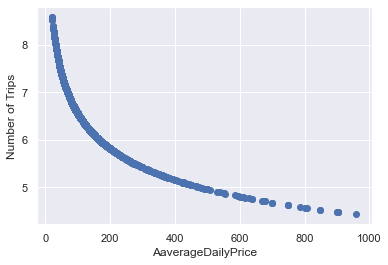

In [289]:
# Class 3 demand curve
class3['renterTripsTaken']= np.exp(model3.params[0] +  model3.params[1] * 5 + model3.params[2] * 10 +  model3.params[3] * 100 +  model3.params[4]*1
    + model3.params[5] * 1424393 + model3.params[6]* 5 + model3.params[7]* 10 + model3.params[-1] * np.log(class3['averageDailyPrice']))
plt.scatter(class3['averageDailyPrice'], class3['renterTripsTaken'])
plt.xlabel("AaverageDailyPrice")
plt.ylabel("Number of Trips")

In [286]:
# Revenume function for class 3
def revenue_example(price):
    # Demand * log(price)  
    return np.exp(model3.params[0] +  model3.params[1] * 5 + model3.params[2] * 10 +  model3.params[3] * 100 + 
                                   model3.params[4]*1 + model3.params[5] * 1424393 + model3.params[6]* 5 + 
                                   model3.params[7]* 10 + model3.params[-1] * np.log(price))* np.log(price) * -1

from scipy.optimize import minimize_scalar
max_x = minimize_scalar(revenue_example, bounds=[min(class3['averageDailyPrice']),max(class3['averageDailyPrice'])],method='bounded')

In [287]:
max_x

     fun: -30.89555537278589
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: 318.05811194985574

Text(0, 0.5, 'Revenue')

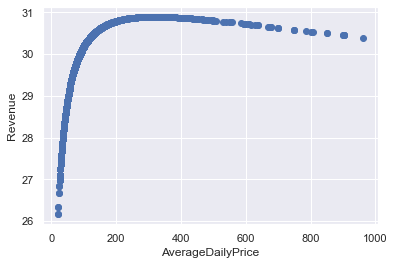

In [288]:
revenue_list = list()
for price in  class3['averageDailyPrice']:
    revenue_list.append(revenue_example(price)*-1)
plt.scatter(class3['averageDailyPrice'], revenue_list)
plt.xlabel("AverageDailyPrice")
plt.ylabel("Revenue")